# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

# Project Instructions
Utilize your unsupervised learning skills to reduce dimensionality and identify clusters in the penguins dataset!
- Begin by reading in "data/penguins.csv" as a pandas DataFrame called penguins_df, then investigate and clean the dataset by removing the null values and outliers. Save as a cleaned DataFrame called penguins_clean.
- Pre-process the cleaned data using standard scaling and the one-hot encoding to add dummy variables:
1. Create the dummy variables and remove the original categorical feature from the dataset.
2. Scale the data using the standard scaling method.
3. Save the updated data as a new DataFrame called penguins_preprocessed.
- Perform Principal Component Analysis (PCA) on the penguins_preprocessed dataset to determine the desired number of components, considering any component with an explained variance ratio above 10% as a suitable component. Save the number of components as a variable called n_components.
Finally, execute PCA using n_components and store the result as penguins_PCA.
- Employ k-means clustering on the penguins_PCA dataset, setting random_state=42, to determine the number of clusters through elbow analysis. Save the optimal number of clusters in a variable called n_cluster.
- Create and fit a new k-means cluster model, setting n_cluster equal to your n_cluster variable, saving the model as a variable called kmeans.
- Visualize your clusters using the first two principle components.
- Add the label column extracted from the k-means clustering (using kmeans.labels_) to the penguins_clean DataFrame.
- Create a statistical table by grouping penguins_clean based on the "label" column and calculating the mean of each numeric column. Save this table as stat_penguins.

## Step 1: importing libraries, datas, and data cleaning 

In [66]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
print(penguins_df.info())

# searching for missing data and eliminating outliers
print(penguins_df.isna().sum())
print(penguins_df.describe())
for column in penguins_df.columns:
    if column == 'sex':
        continue
    else:
     higher = penguins_df[column].quantile(0.985)
     lower = penguins_df[column].quantile(0.015)
     penguins_df = penguins_df[(penguins_df[column]<higher) &
                                     (penguins_df[column]>lower)]
  

print(penguins_df.describe())   
# Modifiying sex to categorical data type
penguins_df = penguins_df.dropna(subset=['sex'])
penguins_df = penguins_df[penguins_df['sex'] != '.']
penguins_df['sex'] = penguins_df['sex'].astype('category')

# Modifiying numeric columns to fillNa
for column in penguins_df.columns:
    if column == 'sex':
        continue
    else:
        penguins_df[column] = penguins_df[column].fillna(penguins_df[column].mean())

assert penguins_df.isna().sum().sum() == 0

penguins_clean = penguins_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB
None
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         214.014620  4201.754386
std            5.459584         1.974793         260.558057   801.954536
min           32.100000        13.100000        -132.000000  2700.000000
25%      

## Step 2: Modeling the data

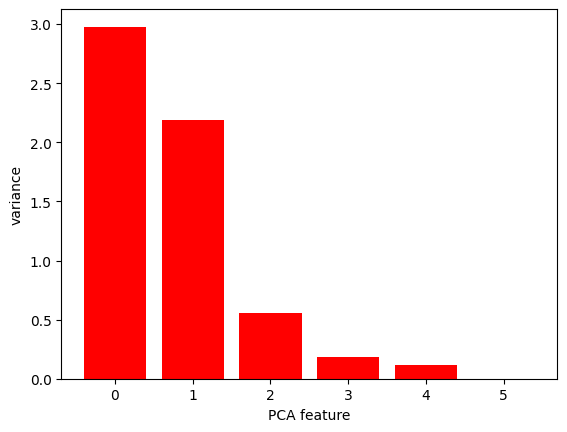

In [67]:
# first we convert categories into numbers for ML 
penguins_clean = pd.get_dummies(penguins_clean, columns=['sex'])

# use standard scaler to elimnate vriance influence
penguins_preprocessed = StandardScaler().fit_transform(penguins_clean)


# preforming PCA to decide on number of components
pca = PCA()
pca.fit(penguins_preprocessed)
plt.bar(range(pca.n_components_),pca.explained_variance_,color='r')
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()


In [68]:
pca.explained_variance_

array([2.97798213e+00, 2.19192273e+00, 5.52853559e-01, 1.86159501e-01,
       1.11988002e-01, 2.80925965e-33])

In [69]:
n_components = 2
penguins_PCA = PCA(n_components = n_components).fit_transform(penguins_preprocessed)

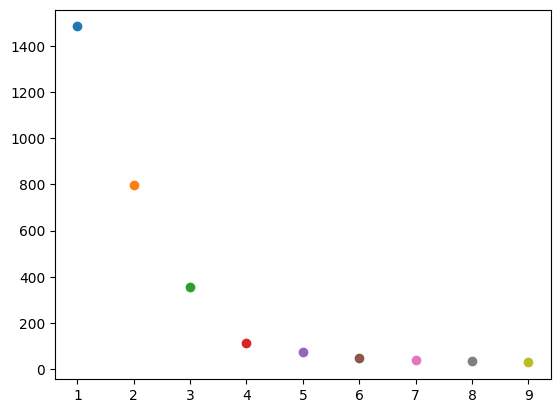

In [70]:
# Preforming elbow analysis
for i in range(1, 10):
 model = KMeans(n_clusters=i, random_state=42)
 model.fit(penguins_PCA)
 plt.scatter(x=i , y=model.inertia_)
plt.show()
    
# according to analysis 4 is optimium
n_cluster = 4

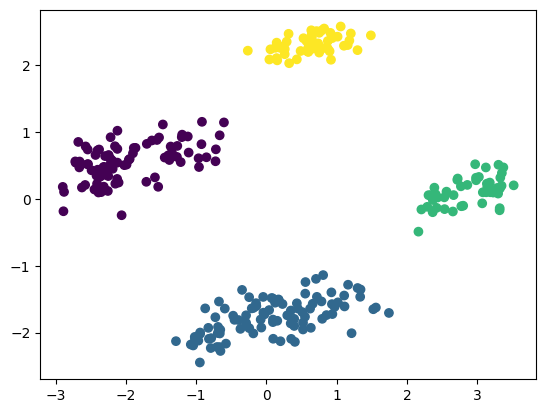

In [71]:
# kmeans modeling
kmeans = KMeans(n_clusters = n_cluster).fit(penguins_PCA)
x = penguins_PCA[:,0]
y = penguins_PCA[:,1]
plt.scatter(x,y,c=kmeans.labels_)
plt.show()
# adding the label
penguins_clean['label'] = kmeans.labels_
stat_penguins = penguins_clean.groupby('label').mean()

# DC solution

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


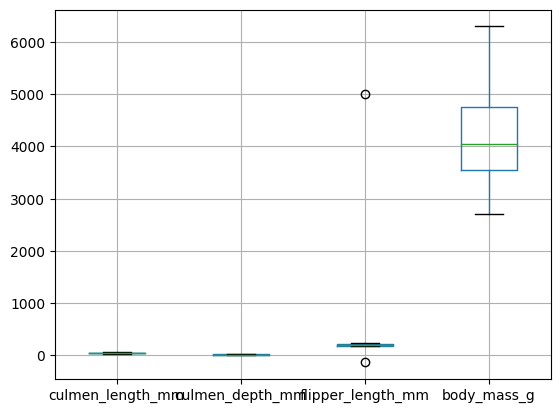

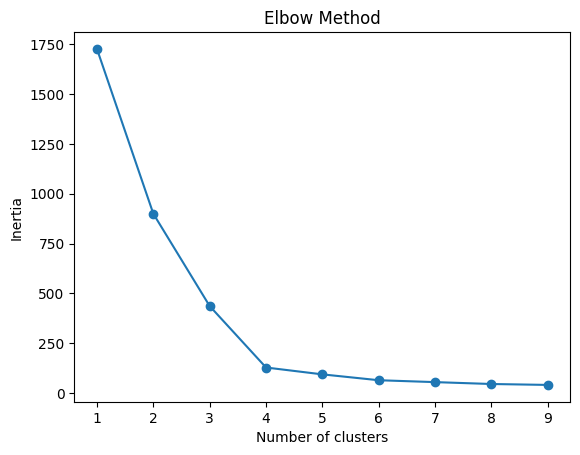

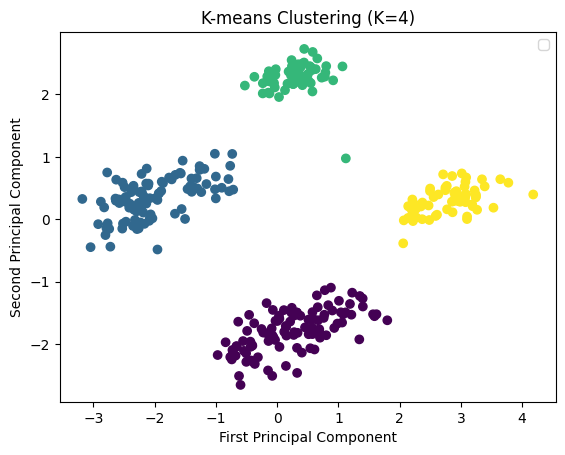

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,45.545763,14.262712,212.779661
3,49.473770,15.718033,221.540984


In [72]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1 - Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.head()
penguins_df.info()

# Step 2 - Dealing with null values and outliers
penguins_df.boxplot()  
plt.show()

penguins_clean = penguins_df.dropna()
penguins_clean[penguins_clean['flipper_length_mm']>4000]
penguins_clean[penguins_clean['flipper_length_mm']<0]
penguins_clean = penguins_clean.drop([9,14])

# Step 3 - Perform preprocessing steps on the dataset to create dummy variables
df = pd.get_dummies(penguins_clean).drop('sex_.',axis=1)

# Step 4 - Perform preprocessing steps on the dataset - scaling
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X,columns=df.columns)
penguins_preprocessed.head(10)

# Step 5 - Perform PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
n_components= sum(dfx_pca.explained_variance_ratio_>0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

# Step 6 - Detect the optimal number of clusters for k-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
n_clusters=4

# Step 7 - Run the k-means clustering algorithm
# with the optimal number of clusters 
# and visualize the resulting clusters.
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

# Step 8 - Create a final statistical DataFrame for each cluster.
penguins_clean['label'] = kmeans.labels_
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins